## Part 1: Explore the Data

Import the data and use Pandas to learn more about the dataset.

In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('Resources/client_dataset.csv')

df.head()

,first,last,job,phone,email,client_id,order_id,order_date,order_week,order_year,item_id,category,subcategory,unit_price,unit_cost,unit_weight,qty,line_number
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,17,2023,EUD29711-63-6U,decor,wall art,1096.80,762.71,7.50,105,1
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,20,2023,XDA18116-89-4A,consumables,pens,24.95,15.09,1.49,21,0
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,4,2023,ABE59463-05-7E,software,project management,13.52,7.86,1.68,39,6
3,Nathan,Baker,Accounting technician,827-788-8123x012,bakernathan@benson.com,46554,9031802,2023-04-25,17,2023,ZMM00836-65-0C,consumables,pens,36.42,24.85,1.23,29,3
4,Christina,Schwartz,Chiropractor,265-829-3643,christinaschwartz9252@mcconnell.com,92089,1322274,2023-05-28,21,2023,BZX55559-12-3X,consumables,misc,195.10,108.17,46.43,20,1


In [3]:
# View the column names in the data
df.columns. values. tolist() 


['first',
 'last',
 'job',
 'phone',
 'email',
 'client_id',
 'order_id',
 'order_date',
 'order_week',
 'order_year',
 'item_id',
 'category',
 'subcategory',
 'unit_price',
 'unit_cost',
 'unit_weight',
 'qty',
 'line_number']

In [4]:
# Use the describe function to gather some basic statistics
df.describe()


,client_id,order_id,order_week,order_year,unit_price,unit_cost,unit_weight,qty,line_number
count,54639.000000,5.463900e+04,54639.000000,54639.000000,54639.000000,54639.000000,54639.000000,5.463900e+04,54639.000000
mean,54837.869416,5.470190e+06,11.359139,2022.993064,136.267207,99.446073,5.004116,5.702646e+02,2.979667
std,25487.438231,2.599807e+06,7.023499,0.082997,183.873135,133.164267,5.326599,1.879552e+04,2.436320
min,10033.000000,1.000886e+06,1.000000,2022.000000,0.010000,0.010000,0.000000,0.000000e+00,0.000000
25%,33593.000000,3.196372e+06,6.000000,2023.000000,20.800000,14.840000,1.450000,3.200000e+01,1.000000
50%,53305.000000,5.496966e+06,11.000000,2023.000000,68.310000,49.890000,3.240000,6.800000e+01,3.000000
75%,78498.000000,7.733869e+06,17.000000,2023.000000,173.160000,125.570000,6.890000,1.700000e+02,5.000000
max,99984.000000,9.998480e+06,52.000000,2023.000000,1396.230000,846.270000,46.430000,3.958244e+06,9.000000


unit_price (Blue)
unit_cost (Orange)


<Axes: ylabel='Frequency'>

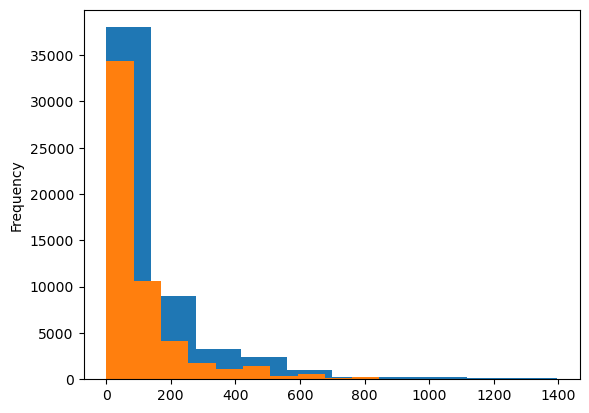

In [5]:
# Visualize Unit Price and Unit Cost

print("unit_price (Blue)")
df.unit_price.plot(kind="hist")
print("unit_cost (Orange)")
df.unit_cost.plot(kind="hist")


In [6]:
# Count of Items where Unit Cost is greater that or equal to Unit Price

losses = df.index[df['unit_cost'] >= df['unit_price']].tolist()
print (len(losses))

99


In [7]:
# missinmg values in DataFrame
null_df = df.isnull().sum()
print(null_df)

first          0
last           0
job            0
phone          0
email          0
client_id      0
order_id       0
order_date     0
order_week     0
order_year     0
item_id        0
category       0
subcategory    0
unit_price     0
unit_cost      0
unit_weight    0
qty            0
line_number    0
dtype: int64


In [8]:
# NaN values in DataFrame
nan_df = df.isna().sum()
print(nan_df)

first          0
last           0
job            0
phone          0
email          0
client_id      0
order_id       0
order_date     0
order_week     0
order_year     0
item_id        0
category       0
subcategory    0
unit_price     0
unit_cost      0
unit_weight    0
qty            0
line_number    0
dtype: int64


In [9]:
# how many rows and columns?
df.shape

(54639, 18)

In [10]:
# datatypes used for each column   
df.dtypes

first           object
last            object
job             object
phone           object
email           object
client_id        int64
order_id         int64
order_date      object
order_week       int64
order_year       int64
item_id         object
category        object
subcategory     object
unit_price     float64
unit_cost      float64
unit_weight    float64
qty              int64
line_number      int64
dtype: object

In [11]:
# What three item categories had the most entries?

df["category"].value_counts().sort_index().head(3)

category
consumables    23538
decor           7954
electronics     2832
Name: count, dtype: int64

In [12]:
# For the category with the most entries,
# which subcategory had the most entries?
df.groupby(['category', 'subcategory'])["category"].count().sort_index().head(1)


category     subcategory      
consumables  bathroom supplies    6424
Name: category, dtype: int64

In [13]:
# Which five clients had the most entries in the data?
df["client_id"].value_counts().head(5)


client_id
33615    220
66037    211
46820    209
38378    207
24741    207
Name: count, dtype: int64

In [14]:
# Store the client ids of those top 5 clients in a list.

top_client_list = df["client_id"].value_counts().head(5).index.tolist()
top_client_list


[33615, 66037, 46820, 38378, 24741]

In [15]:
# How many total units (the qty column) did the
# client with the most entries order order?

top_client_list = df["client_id"].value_counts().head(1).index.tolist()
query_str = "client_id == " + str(top_client_list[0])
df.query(query_str)['qty'].sum()



64313

## Part 2: Transform the Data
Do we know that this client spent the more money than client 66037? If not, how would we find out? Transform the data using the steps below to prepare it for analysis.

In [16]:
# Create a column that calculates the 
# subtotal for each line using the unit_price
# and the qty

def line_sub(row):  
    return  row['unit_price'] * row['qty']
 
df['line_subtotal'] = df.apply(lambda row: line_sub(row), axis=1)

print(df[['unit_price', 'qty', 'line_subtotal']].head(3))

   unit_price  qty  line_subtotal
0     1096.80  105      115164.00
1       24.95   21         523.95
2       13.52   39         527.28


In [17]:
# Create a column for shipping price.
# Assume a shipping price of $7 per pound
# for orders over 50 pounds and $10 per
# pound for items 50 pounds or under.

def cal_ship_price(row):  
    total_weight = row['unit_weight'] * row['qty']
    if total_weight > 50:
        shipping_price = total_weight * 7
    else:
        shipping_price = total_weight *10
    return shipping_price 
df['shipping_price'] = df.apply(lambda row: cal_ship_price(row), axis=1)

print(df[['unit_price', 'unit_weight', 'qty', 'shipping_price']].head(3))


   unit_price  unit_weight  qty  shipping_price
0     1096.80         7.50  105         5512.50
1       24.95         1.49   21          312.90
2       13.52         1.68   39          458.64


In [18]:
# Create a column for the total price
# using the subtotal and the shipping price
# along with a sales tax of 9.25%

def cal_line_price(row):  
    line_price = row['line_subtotal'] + row['shipping_price'] + ((row['line_subtotal'] + row['shipping_price']) * .0925) 
    return round(line_price,2) 
df['line_price'] = df.apply(lambda row: cal_line_price(row), axis=1)

print(df[['line_subtotal', 'shipping_price', 'line_price']].head(3))

   line_subtotal  shipping_price  line_price
0      115164.00         5512.50   131839.08
1         523.95          312.90      914.26
2         527.28          458.64     1077.12


In [19]:
# Create a column for the cost
# of each line using unit cost, qty, and
# shipping price (assume the shipping cost
# is exactly what is charged to the client).

def cal_line_cost(row):  
    line_cost = (row['unit_cost'] * row['qty'])+ row['shipping_price'] 
    return round(line_cost,2) 
df['line_cost'] = df.apply(lambda row: cal_line_cost(row), axis=1)

df[['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id', 'order_date',  'line_subtotal', 'order_week', 'order_year', 'unit_price', 'unit_cost', 'unit_weight', 'qty', 'line_number', 'line_subtotal', 'shipping_price', 'line_price', 'line_cost']].head(3)


,first,last,job,phone,email,client_id,order_id,order_date,line_subtotal,order_week,order_year,unit_price,unit_cost,unit_weight,qty,line_number,line_subtotal,shipping_price,line_price,line_cost
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,115164.00,17,2023,1096.80,762.71,7.50,105,1,115164.00,5512.50,131839.08,85597.05
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,523.95,20,2023,24.95,15.09,1.49,21,0,523.95,312.90,914.26,629.79
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,527.28,4,2023,13.52,7.86,1.68,39,6,527.28,458.64,1077.12,765.18


In [20]:
# Create a column for the profit of
# each line using line cost and line price

def cal_profit(row):  
    profit = (row['line_price'] - row['line_cost'])
    return profit 

df['line_profit'] = df.apply(lambda row: cal_profit(row), axis=1)

df[['first', 'last', 'job', 'phone', 'email', 'client_id', 'order_id', 'order_date',  'line_subtotal', 'order_week', 'order_year', 'unit_price', 'unit_cost', 'unit_weight', 'qty', 'line_number', 'line_subtotal', 'shipping_price', 'line_price', 'line_cost', 'line_profit']].head(3)


,first,last,job,phone,email,client_id,order_id,order_date,line_subtotal,order_week,...,unit_price,unit_cost,unit_weight,qty,line_number,line_subtotal,shipping_price,line_price,line_cost,line_profit
0,Donald,Harding,Immunologist,793-904-7725x39308,harding.donald.7185@sullivan.com,58515,8953482,2023-04-28,115164.00,17,...,1096.80,762.71,7.50,105,1,115164.00,5512.50,131839.08,85597.05,46242.03
1,Tiffany,Myers,Music therapist,201.442.4543x942,myers.t.6537@ferguson-johnson.net,37609,8069089,2023-05-19,523.95,20,...,24.95,15.09,1.49,21,0,523.95,312.90,914.26,629.79,284.47
2,Shannon,Watson,Immunologist,687.737.9424x8503,swatson8146@payne.net,57113,1902144,2023-01-29,527.28,4,...,13.52,7.86,1.68,39,6,527.28,458.64,1077.12,765.18,311.94


## Part 3: Confirm your work
You have email receipts showing that the total prices for 3 orders. Confirm that your calculations match the receipts. Remember, each order has multiple lines.

Order ID 2742071 had a total price of \$152,811.89

Order ID 2173913 had a total price of \$162,388.71

Order ID 6128929 had a total price of \$923,441.25


In [21]:
# Check your work using the totals above
order_2742071 = round(df.loc[df['order_id'] == 2742071, 'line_price'].sum(),2)
print("Order ID 2742071 had a total price of $"+f"{order_2742071:,}")

order_2173913 = round(df.loc[df['order_id'] == 2173913, 'line_price'].sum(),2)
print("Order ID 2173913 had a total price of $"+f"{order_2173913:,}")

order_6128929 = round(df.loc[df['order_id'] == 6128929, 'line_price'].sum(),2)
print("Order ID 6128929 had a total price of $"+f"{order_6128929:,}")


Order ID 2742071 had a total price of $152,811.89
Order ID 2173913 had a total price of $162,388.71
Order ID 6128929 had a total price of $923,441.25


## Part 4: Summarize and Analyze
Use the new columns with confirmed values to find the following information.

In [22]:
# How much did each of the top 5 clients by quantity
# spend? Check your work from Part 1 for client ids.

for top_client in  df["client_id"].value_counts().head(5).index.tolist():
    print(top_client,':',f"{round(df.loc[df['client_id'] == top_client, 'line_price'].sum(),2):,}")



33615 : 8,377,308.52
66037 : 10,259,514.8
46820 : 9,743,794.33
38378 : 12,906,550.87
24741 : 82,268,892.04


In [88]:
# Create a summary DataFrame showing the totals for the
# for the top 5 clients with the following information:
# total units purchased, total shipping price,
# total revenue, and total profit. Sort by total profit.
data = {'client_id': ['0'],
        'qty': ['0'],
        'shipping_price': ['0'],
        'line_price': ['0'],
        'line_cost' : ['0'],
        'line_profit' : ['0']
        }
insert_row = {'client_id': 0,
        'qty': 0,
        'shipping_price': 0,
        'line_price': 0,
        'line_cost' : 0,
        'line_profit' : 0
        }

summary = pd.DataFrame(data)
top_client_list = df["client_id"].value_counts().head(5).index.tolist()

for top_client in  df["client_id"].value_counts().head(5).index.tolist():
    insert_row['client_id'] = top_client
    insert_row['qty']=f"{round(df.loc[df['client_id'] == top_client, 'qty'].sum(),2):,}"
    insert_row['shipping_price']=f"{round(df.loc[df['client_id'] == top_client, 'shipping_price'].sum(),2):,}"
    insert_row['line_price']=f"{round(df.loc[df['client_id'] == top_client, 'line_price'].sum(),2):,}"
    insert_row['line_cost']=f"{round(df.loc[df['client_id'] == top_client, 'line_cost'].sum(),2):,}"
    insert_row['line_profit']=f"{round(df.loc[df['client_id'] == top_client, 'line_profit'].sum(),2):,}"
    summary.loc[-1] = insert_row #inserting row
    summary.index = summary.index + 1  # shifting index
    summary = summary.sort_index()  # sorting by index
    summary = summary.head() 
    summary = summary.sort_values(by='line_profit', ascending=False) #sorting by line_profit
summary[['client_id', 'qty', 'shipping_price', 'line_price', 'line_cost', 'line_profit']]    


,client_id,qty,shipping_price,line_price,line_cost,line_profit
0,24741,"239,862","5,126,448.37","82,268,892.04","45,688,899.71","36,579,992.33"
1,38378,"73,667","3,429,455.4","12,906,550.87","9,634,720.98","3,271,829.89"
3,66037,"43,018","1,395,151.85","10,259,514.8","7,004,482.98","3,255,031.82"
2,46820,"75,768","1,601,448.84","9,743,794.33","7,007,191.64","2,736,602.69"
4,33615,"64,313","1,828,984.89","8,377,308.52","6,175,313.91","2,201,994.61"


In [24]:
# Format the data and rename the columns
# to names suitable for presentation.
# Currency should be in millions of dollars.



In [94]:
# Sort the updated data by "Total Profit" form highest to lowest
data = {'Client ID': ['0'],
        'Units': ['0'],
        'Shipping': ['0'],
        'Total Revenue': ['0'],
        'Total Cost' : ['0'],
        'Total Profit' : ['0']
        }
insert_row = {'Client ID': 0,
        'Units': 0,
        'Shipping': 0,
        'Total Revenue': 0,
        'Total Cost' : 0,
        'Total Profit' : 0
        }

summary = pd.DataFrame(data)
top_client_list = df["client_id"].value_counts().head(5).index.tolist()

for top_client in  df["client_id"].value_counts().head(5).index.tolist():
    insert_row['Client ID'] = top_client
    insert_row['Units']=f"{round(df.loc[df['client_id'] == top_client, 'qty'].sum(),2):,}"
    insert_row['Shipping']=f"${round(df.loc[df['client_id'] == top_client, 'shipping_price'].sum()/1000000,2):,}M"
    insert_row['Total Revenue']=f"${round(df.loc[df['client_id'] == top_client, 'line_price'].sum()/1000000,2):,}M"
    insert_row['Total Cost']=f"${round(df.loc[df['client_id'] == top_client, 'line_cost'].sum()/1000000,2):,}M"
    insert_row['Total Profit']=f"${round(df.loc[df['client_id'] == top_client, 'line_profit'].sum()/1000000,2):,}M"
    summary.loc[-1] = insert_row #inserting row
    summary.index = summary.index + 1  # shifting index
    summary = summary.sort_index()  # sorting by index
    summary = summary.head() 
    summary = summary.sort_values(by='Total Profit', ascending=False) #sorting by line_profit
summary[['Client ID', 'Units', 'Shipping', 'Total Revenue', 'Total Cost', 'Total Profit']]    

,Client ID,Units,Shipping,Total Revenue,Total Cost,Total Profit
0,24741,"239,862",$5.13M,$82.27M,$45.69M,$36.58M
1,38378,"73,667",$3.43M,$12.91M,$9.63M,$3.27M
3,66037,"43,018",$1.4M,$10.26M,$7.0M,$3.26M
2,46820,"75,768",$1.6M,$9.74M,$7.01M,$2.74M
4,33615,"64,313",$1.83M,$8.38M,$6.18M,$2.2M


In [ ]:
# Write a brief 2-3 sentence summary of your findings.

# The Pandas tools used to create, manipulate and display DataFrames are very powerful. 
# These tools, together with tools available in the python support libraries (listed below), 
# provide everything needed for strong data analytics and development.
# 1. Pandas
# 2. NumPy
# 3. Keras
# 4. TensorFlow
# 5. Scikit Learn
# 6. Eli5
# 7. SciPy
# 8. PyTorch
# 9. LightGBM
# 10. Theano 